In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_columns", None)

In [105]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Exploration

In [106]:
df.shape

(768, 9)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [108]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [109]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [110]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

<Axes: >

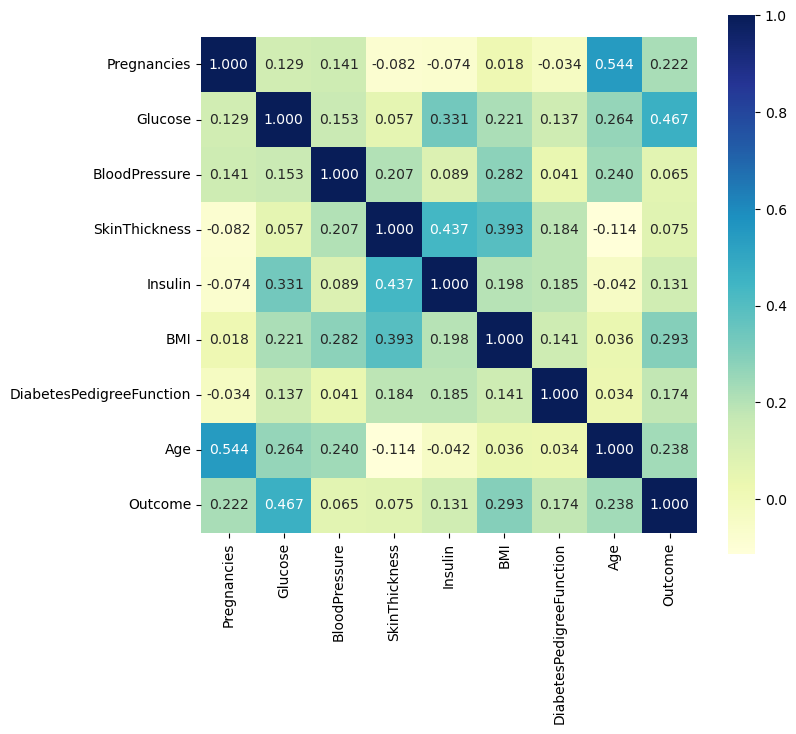

In [111]:
correaltion = df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(correaltion, xticklabels=df.columns, yticklabels=df.columns, annot =True, square=True, fmt=".3f", cmap ="YlGnBu")

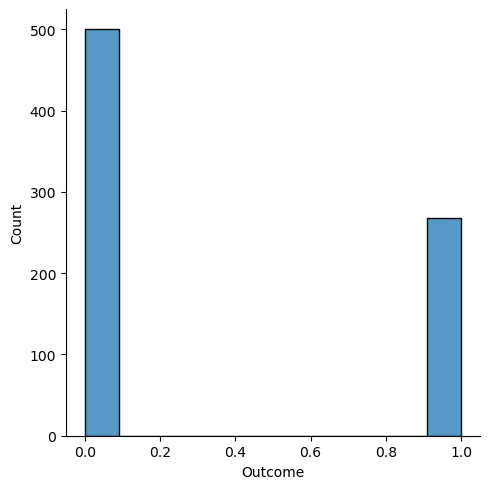

In [116]:
sns.displot(df, x=df.Outcome,)

In [117]:
df.groupby("Outcome").describe()

Pregnancies                                                Glucose  \
              count      mean       std  min   25%  50%  75%   max   count   
Outcome                                                                      
0             500.0  3.298000  3.017185  0.0  1.00  2.0  5.0  13.0   500.0   
1             268.0  4.865672  3.741239  0.0  1.75  4.0  8.0  17.0   268.0   

                                                                BloodPressure  \
               mean        std  min    25%    50%    75%    max         count   
Outcome                                                                         
0        109.980000  26.141200  0.0   93.0  107.0  125.0  197.0         500.0   
1        141.257463  31.939622  0.0  119.0  140.0  167.0  199.0         268.0   

                                                            SkinThickness  \
              mean        std  min   25%   50%   75%    max         count   
Outcome                                                                     
0        68.184000  18.063075  0.0  62.0  70.0  78.0  122.0         500.0   
1        70.824627  21.491812  0.0  66.0  74.0  82.0  114.0         268.0   

                                                          Insulin              \
              mean        std  min  25%   50%   75%   max   count        mean   
Outcome                                                                         
0        19.664000  14.889947  0.0  0.0  21.0  31.0  60.0   500.0   68.792000   
1        22.164179  17.679711  0.0  0.0  27.0  36.0  99.0   268.0  100.335821   

                                                      BMI             \
                std  min  25%   50%     75%    max  count       mean   
Outcome                                                                
0         98.865289  0.0  0.0  39.0  105.00  744.0  500.0  30.304200   
1        138.689125  0.0  0.0   0.0  167.25  846.0  268.0  35.142537   

                                                  DiabetesPedigreeFunction  \
              std  min   25%    50%     75%   max                    count   
Outcome                                                                      
0        7.689855  0.0  25.4  30.05  35.300  57.3                    500.0   
1        7.262967  0.0  30.8  34.25  38.775  67.1                    268.0   

                                                                      Age  \
             mean       std    min      25%    50%      75%    max  count   
Outcome                                                                     
0        0.429734  0.299085  0.078  0.22975  0.336  0.56175  2.329  500.0   
1        0.550500  0.372354  0.088  0.26250  0.449  0.72800  2.420  268.0   

                                                             
              mean        std   min   25%   50%   75%   max  
Outcome                                                      
0        31.190000  11.667655  21.0  23.0  27.0  37.0  81.0  
1        37.067164  10.968254  21.0  28.0  36.0  44.0  70.0

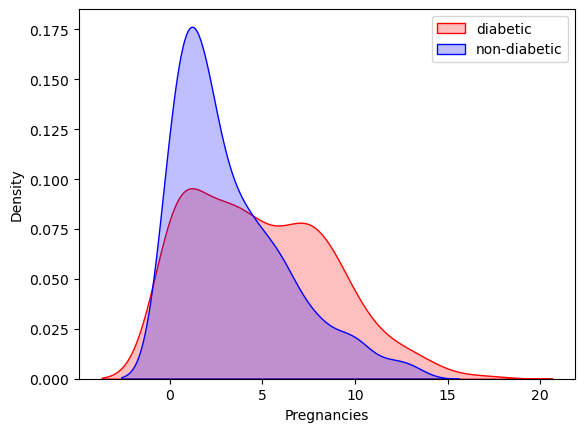

In [118]:
# Density plot between the pregnancy feature and the Target Variable Outcome
kde = sns.kdeplot(df["Pregnancies"][df["Outcome"]==1], color="red", fill=True)
kde = sns.kdeplot(df["Pregnancies"][df["Outcome"]==0], color="blue", fill=True)
kde.set_xlabel("Pregnancies")
kde.set_ylabel("Density")
kde.legend(["diabetic", "non-diabetic"])

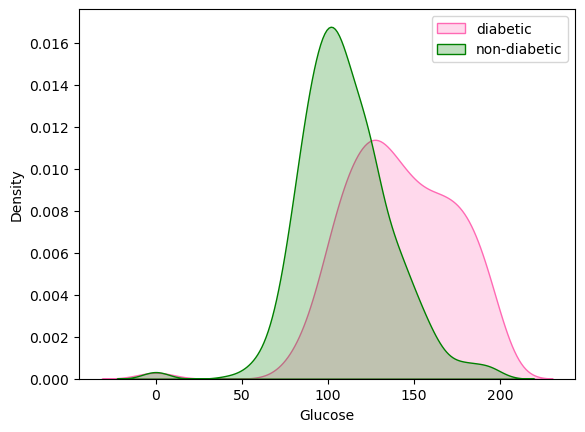

In [119]:
# Density plot between the Glucose feature and the Target Variable Outcome
kde = sns.kdeplot(df["Glucose"][df["Outcome"]==1], color="hotpink", fill=True)
kde = sns.kdeplot(df["Glucose"][df["Outcome"]==0], color="green", fill=True)
kde.set_xlabel("Glucose")
kde.set_ylabel("Density")
kde.legend(["diabetic", "non-diabetic"])

<Axes: xlabel='Outcome', ylabel='Glucose'>

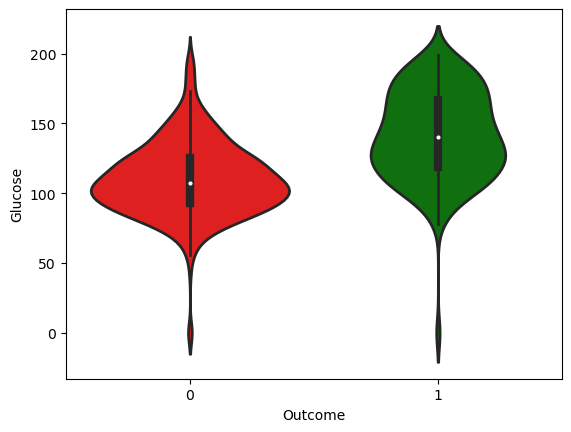

In [121]:
sns.violinplot(data = df, x="Outcome", y = "Glucose", split =True, inner ="box", linewidth=2, palette = ["red", "green"])

# Data Cleaning 

In [197]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [201]:
mask = (df.Insulin >= df.Insulin.quantile(0.95)) | (df.Insulin <= df.Insulin.quantile(0.05)) |(df.Glucose > df.Glucose.quantile(0.95)) | (df.Glucose <= df.Glucose.quantile(0.05)) | (df.BMI >= df.BMI.quantile(0.95)) | (df.BMI <= df.BMI.quantile(0.05)) |(df.BloodPressure >= df.BloodPressure.quantile(0.95)) | (df.BloodPressure <= df.BloodPressure.quantile(0.05)) | (df.SkinThickness >= df.SkinThickness.quantile(0.95)) | (df.SkinThickness <= df.SkinThickness.quantile(0.05))
g =df[~mask].groupby("Age")

In [203]:
df1 = df.replace({
    "Glucose":{0:df.Glucose.median()},
    "Insulin":{0:df.Insulin.median()},
    "SkinThickness":{0:df.SkinThickness.median()},
    "BMI":{0:df.BMI.median()}
})

df2 = df.replace({
    "Glucose":{0:g.Glucose.median()},
    "Insulin":{0:df.Insulin.median()},
    "SkinThickness":{0:g.SkinThickness.median()},
    "BMI":{0:g.BMI.median()}
})

df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35.0,30.5,33.6,0.627,50,1
1,1,85.0,66,29.0,30.5,26.6,0.351,31,0
2,8,183.0,64,25.5,30.5,23.3,0.672,32,1
3,1,89.0,66,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40,35.0,168.0,43.1,2.288,33,1


In [161]:
df[(df.Insulin >= df.Insulin.quantile(0.95)) | (df.Insulin <= df.Insulin.quantile(0.05)) |(df.Glucose > df.Glucose.quantile(0.95)) | (df.Glucose <= df.Glucose.quantile(0.05)) | (df.BMI >= df.BMI.quantile(0.95)) | (df.BMI <= df.BMI.quantile(0.05)) |(df.BloodPressure >= df.BloodPressure.quantile(0.95)) | (df.BloodPressure <= df.BloodPressure.quantile(0.05)) | (df.SkinThickness >= df.SkinThickness.quantile(0.95)) | (df.SkinThickness <= df.SkinThickness.quantile(0.05))  ]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [204]:
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35.0,30.5,33.6,0.627,50,1
1,1,85.0,66,29.0,30.5,26.6,0.351,31,0
2,8,183.0,64,25.5,30.5,23.3,0.672,32,1
3,1,89.0,66,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70,27.0,30.5,36.8,0.340,27,0
765,5,121.0,72,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60,32.0,30.5,30.1,0.349,47,1


# MODEL BUILDING

In [205]:
from sklearn.model_selection import train_test_split

In [206]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [261]:
x = df2.drop(["Outcome"], axis = 1)
y = df2.Outcome

In [262]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.20, random_state=100)

In [263]:
models = {
    "DecisionTree":{
        "model":DecisionTreeClassifier(),
        "params":{
            "criterion" : ["gini", "entropy", "log_loss"]
            
        }},
        "KNeighbours":{
        "model":KNeighborsClassifier(),
        "params":{
            "n_neighbors": np.arange(1,10,2)
        }},
        "Logistic_Regression":{
        "model":LogisticRegression(),
        "params":{
            'C': np.arange(6,11)
        }},
        "SVM":{
        "model":SVC(),
        "params":{
            'C': [1,2,3,4,8],
            'kernel': ['rbf','linear']
        }},
        "Random_Forest":{
        "model":RandomForestClassifier(),
        "params":{
            "n_estimators":np.arange(80,100,4)
        }
    }
}

In [264]:
from sklearn.model_selection import GridSearchCV

In [265]:
score =[]
for model, md in models.items():
    mod = GridSearchCV(md["model"], md["params"], cv = 5, return_train_score=False) # object created of Given model with GSCV
    mod.fit(x_train, y_train)
    score.append({
        "Model_name":model ,
        "best_Score":mod.best_score_ ,
        "best_param":mod.best_params_
    })
    

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [266]:
pd.DataFrame(score)

,Model_name,best_Score,best_param
0,DecisionTree,0.647742,{'criterion': 'entropy'}
1,KNeighbours,0.719355,{'n_neighbors': 5}
2,Logistic_Regression,0.778925,{'C': 7}
3,SVM,0.758925,"{'C': 1, 'kernel': 'linear'}"
4,Random_Forest,0.758925,{'n_estimators': 88}


In [267]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(SVC(C= 8, kernel= "linear"), x_train, y_train ,cv=5)
cvs.mean()

0.752258064516129

In [268]:
cross_val_score(LogisticRegression(C= 7), x_train, y_train ,cv=5).mean()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.7789247311827957

In [269]:
ml_model = LogisticRegression(C= 7)
ml_model.fit(x_train,y_train)
#ml_model.score(x_test, y_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=7)

In [270]:
ml_model.predict(x_test)

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

Text(50.722222222222214, 0.5, 'Predicted')

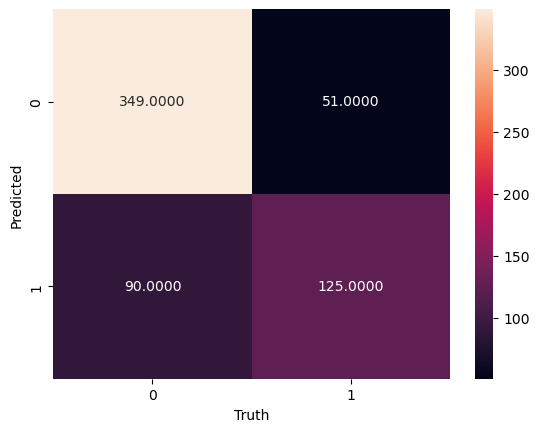

In [272]:
y_pred = ml_model.predict(x_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True , fmt=".4f")
plt.xlabel("Truth")
plt.ylabel("Predicted")

# Saving the model using joblib and pickle

In [274]:
import pickle
with open("db_LR_pickle","wb") as f:
    pickle.dump(ml_model, f)
import joblib
joblib.dump(ml_model, "diabetes_predictor_LR_joblib")

['diabetes_predictor_LR_joblib']